In [4]:
import torch 
import torchvision
from torchvision import transforms, datasets

In [5]:
train = datasets.MNIST("", train=True, download = True, transform = transforms.Compose([transforms.ToTensor()]))

test = datasets.MNIST("", train=False, download = True, transform = transforms.Compose([transforms.ToTensor()]))

In [6]:
trainset = torch.utils.data.DataLoader(train, batch_size = 10, shuffle = True)
testtest = torch.utils.data.DataLoader(test, batch_size = 10, shuffle = True)

In [7]:
for data in trainset:
  print(data)
  break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [8]:
x, y = data[0][0], data[1][0]
print(y)

tensor(6)


In [9]:
print(data[0][0].shape) #we need to reshape this as done below

torch.Size([1, 28, 28])


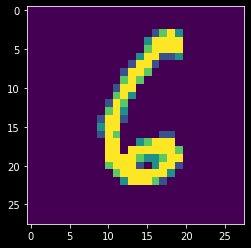

In [10]:
import matplotlib.pyplot as plt
plt.imshow(data[0][0].view(28, 28))


In [11]:
print(data[0][0].shape)

torch.Size([1, 28, 28])


In [12]:
#traversing through the dataset and finding the number of values for 1-9 exist
total = 0
counter_dict = {0:0,1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0}

for data in trainset:
    Xs, ys = data
    for y in ys:
        counter_dict[int(y)] += 1
        total+=1

print(counter_dict)

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [13]:
for i in counter_dict:
    print(f"{i} : {counter_dict[i]/total*100}")

0 : 9.871666666666666
1 : 11.236666666666666
2 : 9.93
3 : 10.218333333333334
4 : 9.736666666666666
5 : 9.035
6 : 9.863333333333333
7 : 10.441666666666666
8 : 9.751666666666667
9 : 9.915000000000001


Building the Neural Network

In [14]:
import torch.nn as nn
import torch.nn.functional as F

In [15]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784,64)
        #here fc1 is the first fully connected layer in the above code the parameters for Linear are (input, output) and here it is 784 becuse our images are 28*28.
        self.fc2 = nn.Linear(64,64)
        self.fc3 = nn.Linear(64,64)
        self.fc4 = nn.Linear(64,10) #here, the output layer has 10 outputs becuase the numbers range from 1-10
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim=1)
    
net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [16]:
#
x = torch.rand(28,28)
x = x.view(-1, 28*28)


In [17]:
output = net(x)

In [18]:
output

tensor([[-2.3016, -2.3944, -2.3574, -2.3297, -2.2702, -2.3247, -2.3707, -2.2907,
         -2.2179, -2.1880]], grad_fn=<LogSoftmaxBackward0>)

In [29]:
import torch.optim as optim 
import torch
from torch import nn
from lion_pytorch import Lion

optimizer = Lion(net.parameters(), lr=0.001)

EPOCHS = 3

for epoch in range(EPOCHS):
    for data in trainset :
        #data is a batch of featuresets and labels
        x, y = data
        net.zero_grad()
        output = net(x.view(-1, 28*28))
        loss = F.nll_loss(output, y)
        loss.backward()
        optimizer.step()
    print(loss)

tensor(0.4279, grad_fn=<NllLossBackward0>)
tensor(0.1053, grad_fn=<NllLossBackward0>)
tensor(0.0758, grad_fn=<NllLossBackward0>)


In [30]:
correct = 0
total = 0

with torch.no_grad():
    for data in trainset:
        x, y = data
        output = net(x.view(-1, 784))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1
print("Accuracy: ", round(correct/total, 3))

Accuracy:  0.904


In [22]:
x

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0.

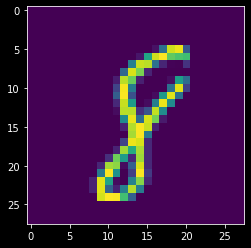

In [24]:
import matplotlib.pyplot as plt
plt.imshow(x[0].view(28,28))
plt.show()

In [25]:
print(torch.argmax(net(x[0].view(-1, 784))[0]))

tensor(8)
